<a href="https://colab.research.google.com/github/Anuja6125/covid-19-cases-analysis/blob/main/Covid_19_cases_analysis_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize": (12, 6)})


In [3]:
url = '/content/Covid-19 cases INDIA.csv'
df = pd.read_csv(url)

In [8]:
india = df[df["location"] == "India"]

(1682, 67)

In [11]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682 entries, 173549 to 175230
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1682 non-null   object 
 1   continent                                   1682 non-null   object 
 2   location                                    1682 non-null   object 
 3   date                                        1682 non-null   object 
 4   total_cases                                 1674 non-null   float64
 5   new_cases                                   1674 non-null   float64
 6   new_cases_smoothed                          1669 non-null   float64
 7   total_deaths                                1674 non-null   float64
 8   new_deaths                                  1674 non-null   float64
 9   new_deaths_smoothed                         1669 non-null   float64
 10  total_case

/tmp/ipython-input-2930709749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india["date"] = pd.to_datetime(india["date"], dayfirst=True)


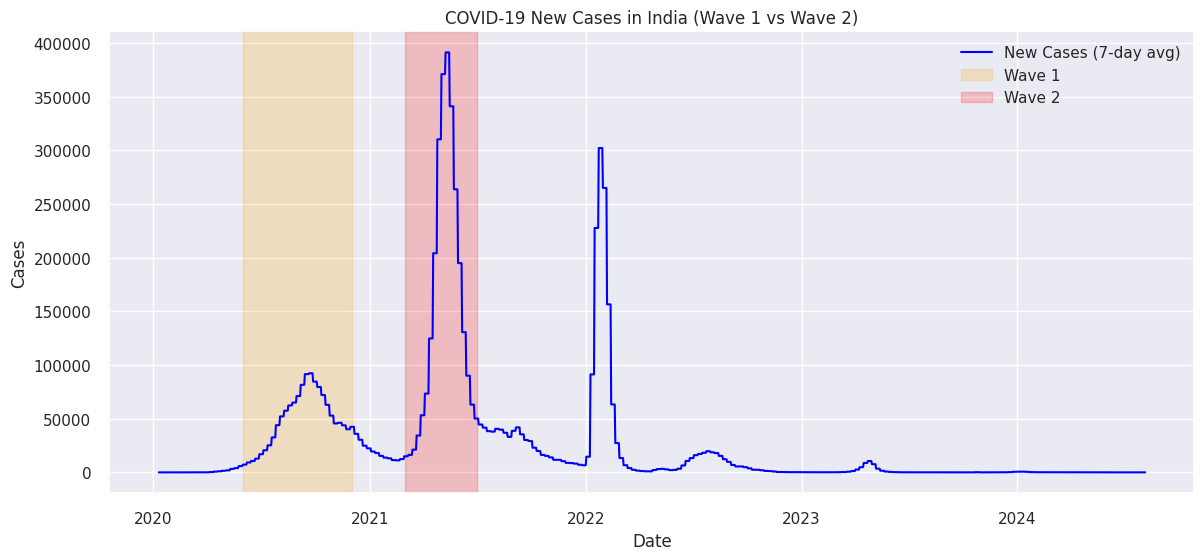

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date column is datetime
india["date"] = pd.to_datetime(india["date"], dayfirst=True)

plt.figure(figsize=(14,6))
plt.plot(india["date"], india["new_cases_smoothed"], label="New Cases (7-day avg)", color="blue")

# Wave 1 (approx Jun 2020 – Dec 2020)
plt.axvspan(pd.to_datetime("2020-06-01").to_pydatetime(),
            pd.to_datetime("2020-12-01").to_pydatetime(),
            color="orange", alpha=0.2, label="Wave 1")

# Wave 2 (approx Mar 2021 – Jul 2021)
plt.axvspan(pd.to_datetime("2021-03-01").to_pydatetime(),
            pd.to_datetime("2021-07-01").to_pydatetime(),
            color="red", alpha=0.2, label="Wave 2")

plt.title("COVID-19 New Cases in India (Wave 1 vs Wave 2)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()


In [24]:
# Wave 1: June 2020 – Jan 2021
wave1 = india[(india["date"] >= "2020-06-01") & (india["date"] <= "2021-01-31")]

# Wave 2: March 2021 – July 2021
wave2 = india[(india["date"] >= "2021-03-01") & (india["date"] <= "2021-07-31")]


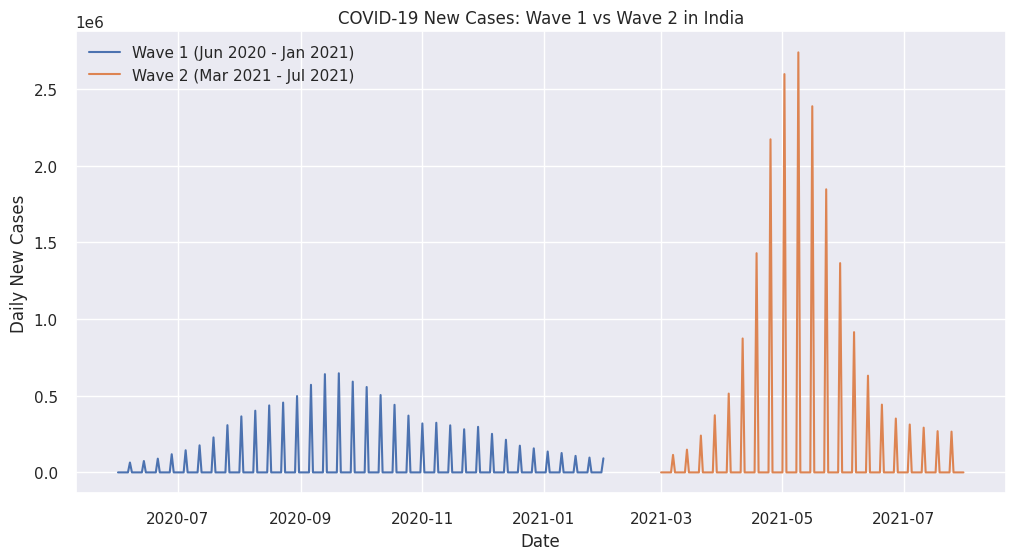

In [25]:
plt.figure(figsize=(12,6))

plt.plot(wave1["date"], wave1["new_cases"], label="Wave 1 (Jun 2020 - Jan 2021)")
plt.plot(wave2["date"], wave2["new_cases"], label="Wave 2 (Mar 2021 - Jul 2021)")

plt.title("COVID-19 New Cases: Wave 1 vs Wave 2 in India")
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.legend()
plt.show()


In [26]:
# Peak daily cases
peak_wave1 = wave1["new_cases"].max()
peak_wave2 = wave2["new_cases"].max()

# Average daily cases
avg_wave1 = wave1["new_cases"].mean()
avg_wave2 = wave2["new_cases"].mean()

# Total cases
total_wave1 = wave1["new_cases"].sum()
total_wave2 = wave2["new_cases"].sum()

print("📊 Wave 1 (Jun 2020 – Jan 2021):")
print(f"Peak Daily Cases: {peak_wave1:,.0f}")
print(f"Average Daily Cases: {avg_wave1:,.0f}")
print(f"Total Cases: {total_wave1:,.0f}\n")

print("📊 Wave 2 (Mar 2021 – Jul 2021):")
print(f"Peak Daily Cases: {peak_wave2:,.0f}")
print(f"Average Daily Cases: {avg_wave2:,.0f}")
print(f"Total Cases: {total_wave2:,.0f}")


📊 Wave 1 (Jun 2020 – Jan 2021):
Peak Daily Cases: 646,263
Average Daily Cases: 43,119
Total Cases: 10,564,040

📊 Wave 2 (Mar 2021 – Jul 2021):
Peak Daily Cases: 2,738,957
Average Daily Cases: 132,517
Total Cases: 20,275,170


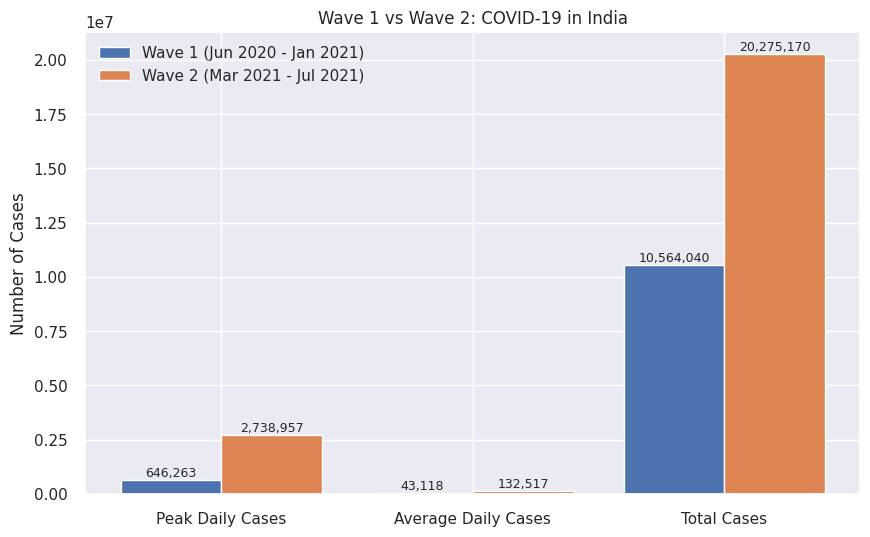

In [28]:
import matplotlib.pyplot as plt

# Prepare data
metrics = ["Peak Daily Cases", "Average Daily Cases", "Total Cases"]
wave1_values = [peak_wave1, avg_wave1, total_wave1]
wave2_values = [peak_wave2, avg_wave2, total_wave2]

x = range(len(metrics))

plt.figure(figsize=(10,6))

# Bars
bars1 = plt.bar([i - 0.2 for i in x], wave1_values, width=0.4, label="Wave 1 (Jun 2020 - Jan 2021)")
bars2 = plt.bar([i + 0.2 for i in x], wave2_values, width=0.4, label="Wave 2 (Mar 2021 - Jul 2021)")

# Add labels on top of bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval):,}",
             ha="center", va="bottom", fontsize=9, rotation=0)

# Formatting
plt.xticks(x, metrics)
plt.ylabel("Number of Cases")
plt.title("Wave 1 vs Wave 2: COVID-19 in India")
plt.legend()
plt.show()



In [29]:
# Peak daily deaths
peak_deaths_wave1 = wave1["new_deaths"].max()
peak_deaths_wave2 = wave2["new_deaths"].max()

# Average daily deaths
avg_deaths_wave1 = wave1["new_deaths"].mean()
avg_deaths_wave2 = wave2["new_deaths"].mean()

# Total deaths
total_deaths_wave1 = wave1["new_deaths"].sum()
total_deaths_wave2 = wave2["new_deaths"].sum()

print("☠️ Wave 1 Deaths (Jun 2020 – Jan 2021):")
print(f"Peak Daily Deaths: {peak_deaths_wave1:,.0f}")
print(f"Average Daily Deaths: {avg_deaths_wave1:,.0f}")
print(f"Total Deaths: {total_deaths_wave1:,.0f}\n")

print("☠️ Wave 2 Deaths (Mar 2021 – Jul 2021):")
print(f"Peak Daily Deaths: {peak_deaths_wave2:,.0f}")
print(f"Average Daily Deaths: {avg_deaths_wave2:,.0f}")
print(f"Total Deaths: {total_deaths_wave2:,.0f}")


☠️ Wave 1 Deaths (Jun 2020 – Jan 2021):
Peak Daily Deaths: 8,166
Average Daily Deaths: 609
Total Deaths: 149,110

☠️ Wave 2 Deaths (Mar 2021 – Jul 2021):
Peak Daily Deaths: 28,982
Average Daily Deaths: 1,722
Total Deaths: 263,500


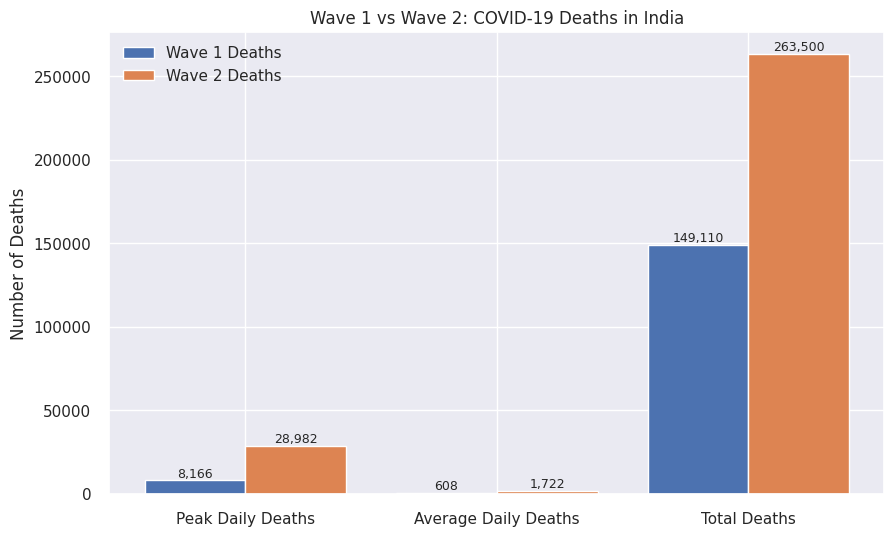

In [30]:
metrics = ["Peak Daily Deaths", "Average Daily Deaths", "Total Deaths"]
wave1_death_values = [peak_deaths_wave1, avg_deaths_wave1, total_deaths_wave1]
wave2_death_values = [peak_deaths_wave2, avg_deaths_wave2, total_deaths_wave2]

x = range(len(metrics))

plt.figure(figsize=(10,6))

bars1 = plt.bar([i - 0.2 for i in x], wave1_death_values, width=0.4, label="Wave 1 Deaths")
bars2 = plt.bar([i + 0.2 for i in x], wave2_death_values, width=0.4, label="Wave 2 Deaths")

# Add numeric labels
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval):,}",
             ha="center", va="bottom", fontsize=9)

plt.xticks(x, metrics)
plt.ylabel("Number of Deaths")
plt.title("Wave 1 vs Wave 2: COVID-19 Deaths in India")
plt.legend()
plt.show()


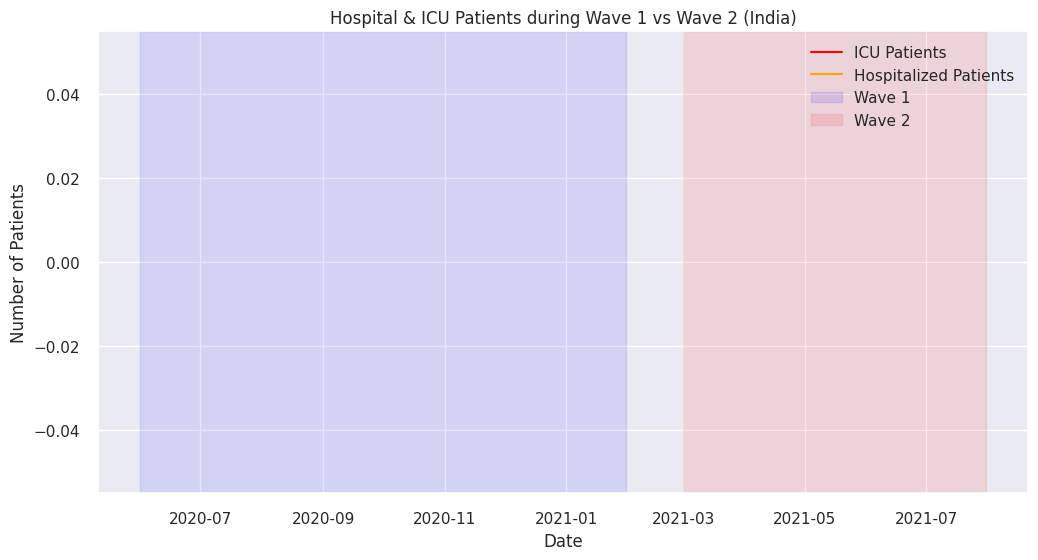

In [31]:
plt.figure(figsize=(12,6))
plt.plot(india["date"], india["icu_patients"], label="ICU Patients", color="red")
plt.plot(india["date"], india["hosp_patients"], label="Hospitalized Patients", color="orange")

plt.axvspan("2020-06-01", "2021-01-31", color="blue", alpha=0.1, label="Wave 1")
plt.axvspan("2021-03-01", "2021-07-31", color="red", alpha=0.1, label="Wave 2")

plt.title("Hospital & ICU Patients during Wave 1 vs Wave 2 (India)")
plt.xlabel("Date")
plt.ylabel("Number of Patients")
plt.legend()
plt.show()


📊 Wave 1 (Jun 2020 – Jan 2021):
Peak Daily Cases: 646,263
Average Daily Cases: 43,119
Total Cases: 10,564,040
Peak Daily Tests: 1,492,409
Average Daily Tests: 785,653
Average Positivity Rate: 6.23%

📊 Wave 2 (Mar 2021 – Jul 2021):
Peak Daily Cases: 2,738,957
Average Daily Cases: 132,517
Total Cases: 20,275,170
Peak Daily Tests: 3,740,296
Average Daily Tests: 1,656,387
Average Positivity Rate: 8.05%


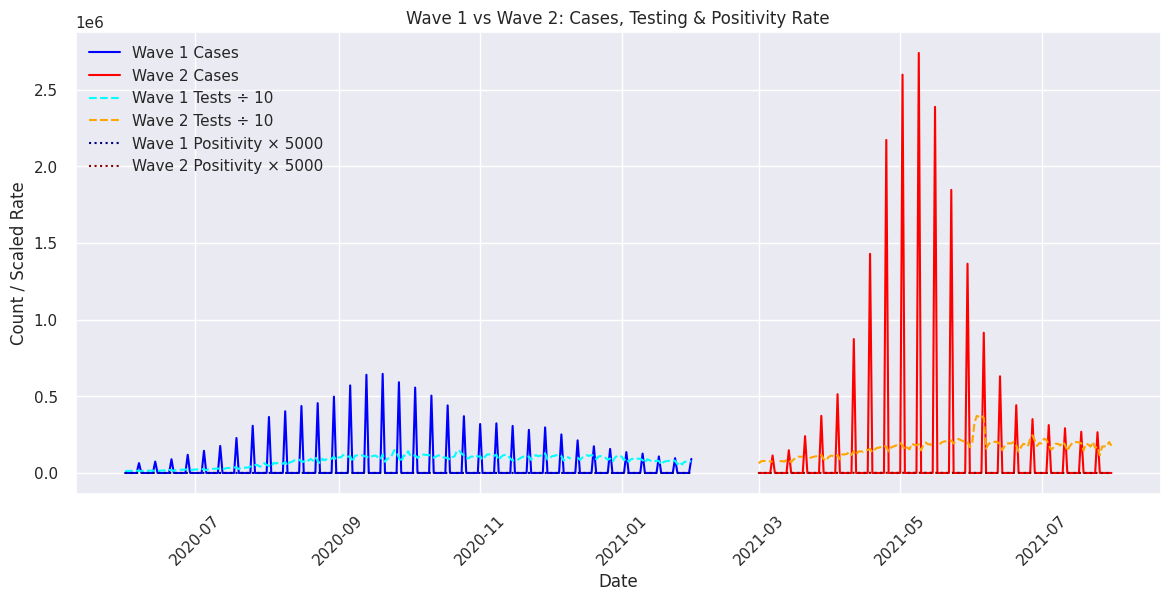

In [33]:
# --- Numeric Summary ---
# Peak daily cases
peak_wave1 = wave1["new_cases"].max()
peak_wave2 = wave2["new_cases"].max()

# Average daily cases
avg_wave1 = wave1["new_cases"].mean()
avg_wave2 = wave2["new_cases"].mean()

# Total cases
total_wave1 = wave1["new_cases"].sum()
total_wave2 = wave2["new_cases"].sum()

# Peak & average daily tests
peak_tests_wave1 = wave1["new_tests"].max()
peak_tests_wave2 = wave2["new_tests"].max()

avg_tests_wave1 = wave1["new_tests"].mean()
avg_tests_wave2 = wave2["new_tests"].mean()

# Average positivity rate
avg_pos_wave1 = wave1["positive_rate"].mean()
avg_pos_wave2 = wave2["positive_rate"].mean()

print("📊 Wave 1 (Jun 2020 – Jan 2021):")
print(f"Peak Daily Cases: {peak_wave1:,.0f}")
print(f"Average Daily Cases: {avg_wave1:,.0f}")
print(f"Total Cases: {total_wave1:,.0f}")
print(f"Peak Daily Tests: {peak_tests_wave1:,.0f}")
print(f"Average Daily Tests: {avg_tests_wave1:,.0f}")
print(f"Average Positivity Rate: {avg_pos_wave1:.2%}\n")

print("📊 Wave 2 (Mar 2021 – Jul 2021):")
print(f"Peak Daily Cases: {peak_wave2:,.0f}")
print(f"Average Daily Cases: {avg_wave2:,.0f}")
print(f"Total Cases: {total_wave2:,.0f}")
print(f"Peak Daily Tests: {peak_tests_wave2:,.0f}")
print(f"Average Daily Tests: {avg_tests_wave2:,.0f}")
print(f"Average Positivity Rate: {avg_pos_wave2:.2%}")

# --- Combined Plot ---
plt.figure(figsize=(14,6))

# Plot daily new cases
plt.plot(wave1['date'], wave1['new_cases'], label='Wave 1 Cases', color='blue')
plt.plot(wave2['date'], wave2['new_cases'], label='Wave 2 Cases', color='red')

# Plot daily new tests (scaled for visibility)
plt.plot(wave1['date'], wave1['new_tests']/10, label='Wave 1 Tests ÷ 10', color='cyan', linestyle='--')
plt.plot(wave2['date'], wave2['new_tests']/10, label='Wave 2 Tests ÷ 10', color='orange', linestyle='--')

# Plot positivity rate
plt.plot(wave1['date'], wave1['positive_rate']*5000, label='Wave 1 Positivity × 5000', color='navy', linestyle=':')
plt.plot(wave2['date'], wave2['positive_rate']*5000, label='Wave 2 Positivity × 5000', color='darkred', linestyle=':')

plt.title('Wave 1 vs Wave 2: Cases, Testing & Positivity Rate')
plt.xlabel('Date')
plt.ylabel('Count / Scaled Rate')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [34]:
# --- Numeric Summary for Testing and Vaccinations ---
# Peak daily tests
peak_tests_wave1 = wave1["new_tests"].max()
peak_tests_wave2 = wave2["new_tests"].max()

# Average daily tests
avg_tests_wave1 = wave1["new_tests"].mean()
avg_tests_wave2 = wave2["new_tests"].mean()

# Average positivity rate
avg_pos_wave1 = wave1["positive_rate"].mean()
avg_pos_wave2 = wave2["positive_rate"].mean()

# Total vaccinations (end of wave value)
total_vac_wave1_end = wave1["total_vaccinations"].iloc[-1] if not wave1["total_vaccinations"].isnull().all() else None
total_vac_wave2_end = wave2["total_vaccinations"].iloc[-1] if not wave2["total_vaccinations"].isnull().all() else None

# New vaccinations (average daily)
avg_new_vac_wave1 = wave1["new_vaccinations_smoothed"].mean()
avg_new_vac_wave2 = wave2["new_vaccinations_smoothed"].mean()


print("🔬 Testing and 💉 Vaccination Data - Wave 1 (Jun 2020 – Jan 2021):")
print(f"Peak Daily Tests: {peak_tests_wave1:,.0f}")
print(f"Average Daily Tests: {avg_tests_wave1:,.0f}")
print(f"Average Positivity Rate: {avg_pos_wave1:.2%}")
print(f"Total Vaccinations by End of Wave 1: {total_vac_wave1_end:,.0f}" if total_vac_wave1_end is not None else "Total Vaccinations by End of Wave 1: Data Not Available")
print(f"Average Daily New Vaccinations: {avg_new_vac_wave1:,.0f}" if not pd.isna(avg_new_vac_wave1) else "Average Daily New Vaccinations: Data Not Available")
print("-" * 30)

print("🔬 Testing and 💉 Vaccination Data - Wave 2 (Mar 2021 – Jul 2021):")
print(f"Peak Daily Tests: {peak_tests_wave2:,.0f}")
print(f"Average Daily Tests: {avg_tests_wave2:,.0f}")
print(f"Average Positivity Rate: {avg_pos_wave2:.2%}")
print(f"Total Vaccinations by End of Wave 2: {total_vac_wave2_end:,.0f}" if total_vac_wave2_end is not None else "Total Vaccinations by End of Wave 2: Data Not Available")
print(f"Average Daily New Vaccinations: {avg_new_vac_wave2:,.0f}" if not pd.isna(avg_new_vac_wave2) else "Average Daily New Vaccinations: Data Not Available")

🔬 Testing and 💉 Vaccination Data - Wave 1 (Jun 2020 – Jan 2021):
Peak Daily Tests: 1,492,409
Average Daily Tests: 785,653
Average Positivity Rate: 6.23%
Total Vaccinations by End of Wave 1: 3,758,843
Average Daily New Vaccinations: 211,218
------------------------------
🔬 Testing and 💉 Vaccination Data - Wave 2 (Mar 2021 – Jul 2021):
Peak Daily Tests: 3,740,296
Average Daily Tests: 1,656,387
Average Positivity Rate: 8.05%
Total Vaccinations by End of Wave 2: nan
Average Daily New Vaccinations: 2,863,986


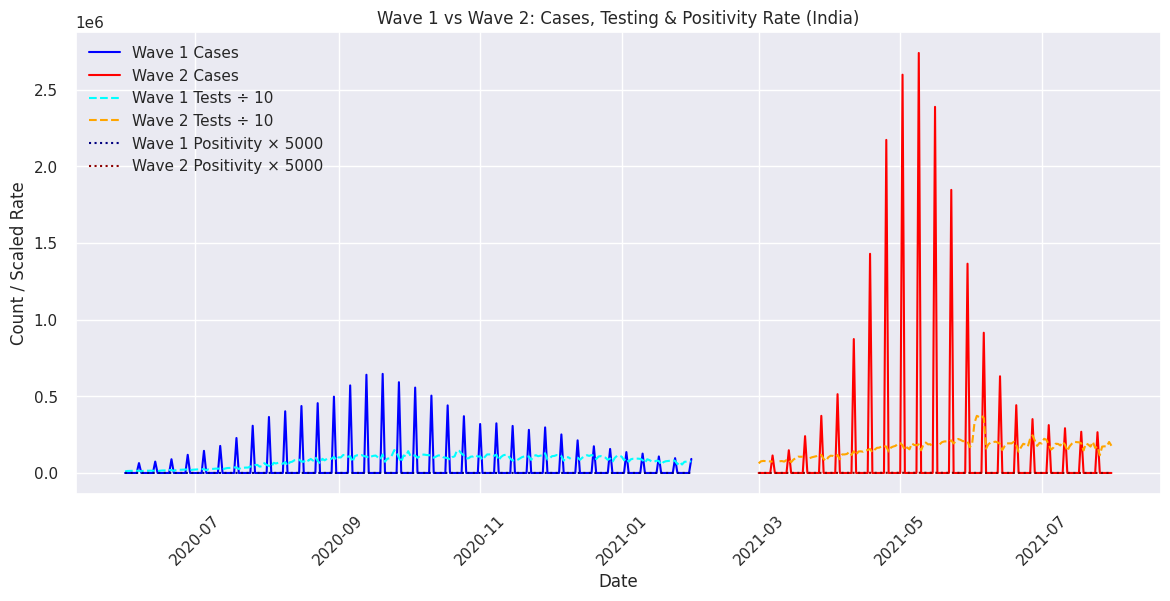

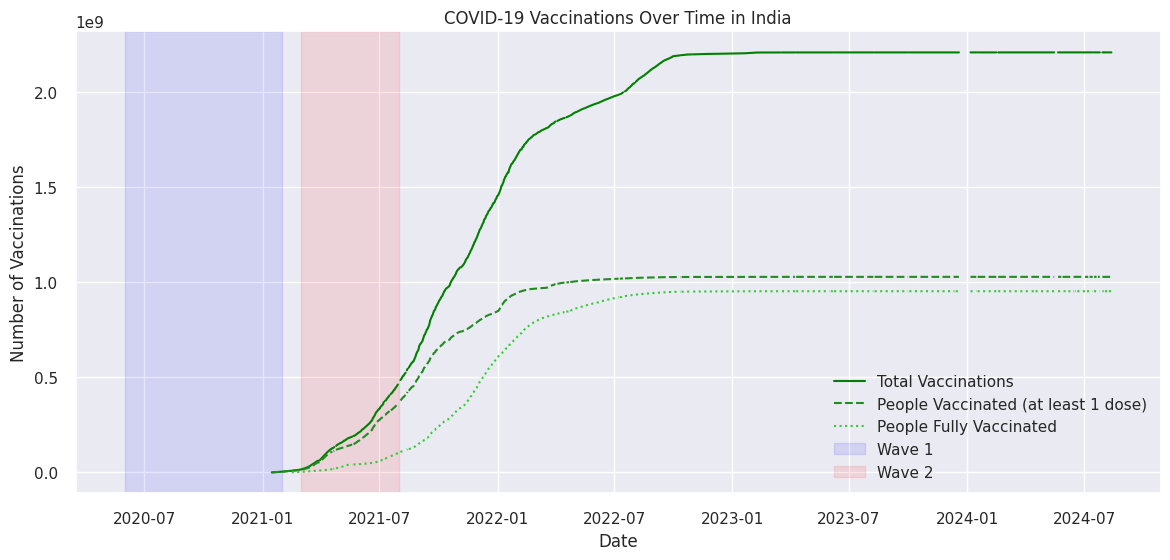

In [35]:
# --- Combined Plot for Cases, Testing, and Positivity Rate ---
plt.figure(figsize=(14,6))

# Plot daily new cases
plt.plot(wave1['date'], wave1['new_cases'], label='Wave 1 Cases', color='blue')
plt.plot(wave2['date'], wave2['new_cases'], label='Wave 2 Cases', color='red')

# Plot daily new tests (scaled for visibility)
plt.plot(wave1['date'], wave1['new_tests']/10, label='Wave 1 Tests ÷ 10', color='cyan', linestyle='--')
plt.plot(wave2['date'], wave2['new_tests']/10, label='Wave 2 Tests ÷ 10', color='orange', linestyle='--')

# Plot positivity rate
plt.plot(wave1['date'], wave1['positive_rate']*5000, label='Wave 1 Positivity × 5000', color='navy', linestyle=':')
plt.plot(wave2['date'], wave2['positive_rate']*5000, label='Wave 2 Positivity × 5000', color='darkred', linestyle=':')

plt.title('Wave 1 vs Wave 2: Cases, Testing & Positivity Rate (India)')
plt.xlabel('Date')
plt.ylabel('Count / Scaled Rate')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# --- Plot for Vaccinations ---
plt.figure(figsize=(14,6))

plt.plot(india["date"], india["total_vaccinations"], label="Total Vaccinations", color="green")
plt.plot(india["date"], india["people_vaccinated"], label="People Vaccinated (at least 1 dose)", color="forestgreen", linestyle='--')
plt.plot(india["date"], india["people_fully_vaccinated"], label="People Fully Vaccinated", color="limegreen", linestyle=':')


plt.axvspan("2020-06-01", "2021-01-31", color="blue", alpha=0.1, label="Wave 1")
plt.axvspan("2021-03-01", "2021-07-31", color="red", alpha=0.1, label="Wave 2")

plt.title("COVID-19 Vaccinations Over Time in India")
plt.xlabel("Date")
plt.ylabel("Number of Vaccinations")
plt.legend()
plt.show()

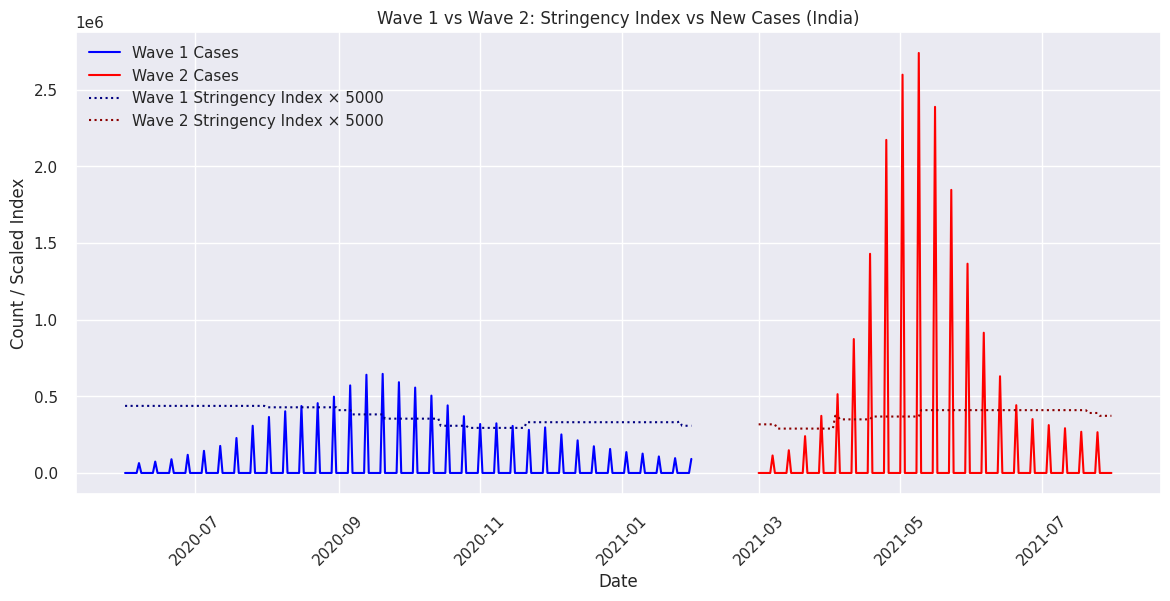

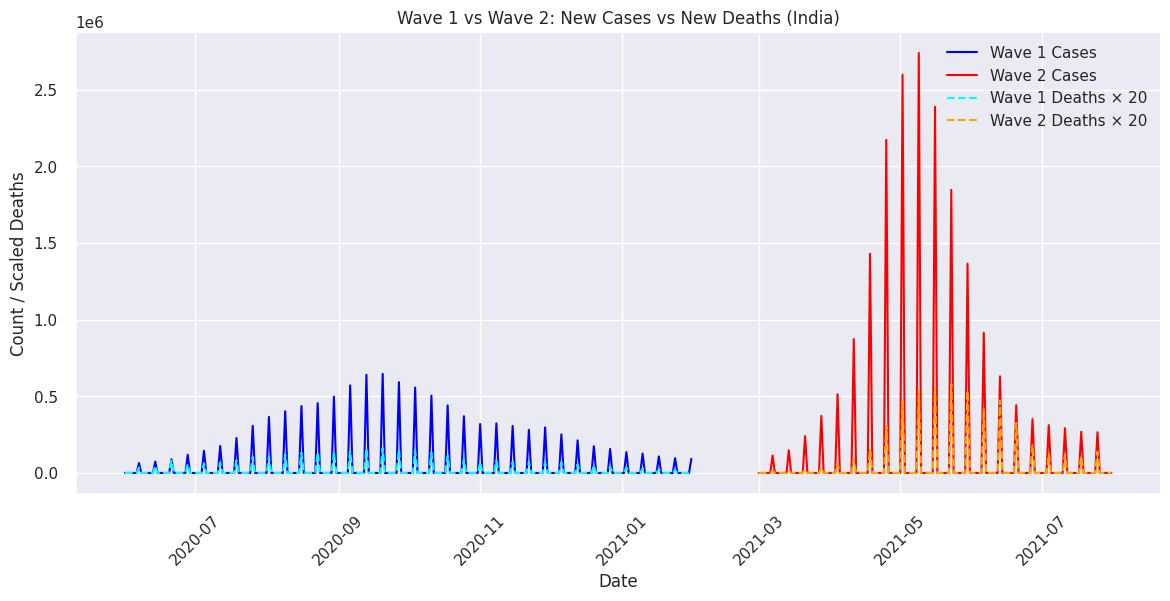

In [36]:
# Plot Stringency Index vs New Cases
plt.figure(figsize=(14, 6))

plt.plot(wave1['date'], wave1['new_cases'], label='Wave 1 Cases', color='blue')
plt.plot(wave2['date'], wave2['new_cases'], label='Wave 2 Cases', color='red')

# Scale stringency index for visibility on the same plot
plt.plot(wave1['date'], wave1['stringency_index'] * 5000, label='Wave 1 Stringency Index × 5000', color='navy', linestyle=':')
plt.plot(wave2['date'], wave2['stringency_index'] * 5000, label='Wave 2 Stringency Index × 5000', color='darkred', linestyle=':')


plt.title('Wave 1 vs Wave 2: Stringency Index vs New Cases (India)')
plt.xlabel('Date')
plt.ylabel('Count / Scaled Index')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot New Cases vs New Deaths
plt.figure(figsize=(14, 6))

plt.plot(wave1['date'], wave1['new_cases'], label='Wave 1 Cases', color='blue')
plt.plot(wave2['date'], wave2['new_cases'], label='Wave 2 Cases', color='red')

# Plot new deaths (scaled for visibility)
plt.plot(wave1['date'], wave1['new_deaths'] * 20, label='Wave 1 Deaths × 20', color='cyan', linestyle='--')
plt.plot(wave2['date'], wave2['new_deaths'] * 20, label='Wave 2 Deaths × 20', color='orange', linestyle='--')


plt.title('Wave 1 vs Wave 2: New Cases vs New Deaths (India)')
plt.xlabel('Date')
plt.ylabel('Count / Scaled Deaths')
plt.xticks(rotation=45)
plt.legend()
plt.show()